In [1]:
%matplotlib inline
from __future__ import division #Load within Python 2.7 for regular
division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
cali_housing = fetch_california_housing()
X = cali_housing.data
y = cali_housing.target

In [3]:
#bin output variable to split training and testing sets into two similar sets
bins = np.arange(6)
binned_y = np.digitize(y, bins)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=binned_y)

In [4]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

In [5]:
param_dist = {'max_features' : ['log2',1.0],
'max_depth' : [3, 5, 7, 10],
'min_samples_leaf' : [2, 3, 5, 10],
'n_estimators': [50, 100],
'learning_rate' : [0.0001,0.001,0.01,0.05,0.1,0.3],
'loss' : ['ls','huber']
}

In [6]:
pre_gs_inst = RandomizedSearchCV(GradientBoostingRegressor(warm_start=True),
     param_distributions = param_dist,
     cv=3,
     n_iter = 30, n_jobs=-1)
pre_gs_inst.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(warm_start=True),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.05, 0.1, 0.3],
                                        'loss': ['ls', 'huber'],
                                        'max_depth': [3, 5, 7, 10],
                                        'max_features': ['log2', 1.0],
                                        'min_samples_leaf': [2, 3, 5, 10],
                                        'n_estimators': [50, 100]})

In [9]:
import numpy as np
import pandas as pd
def get_grid_df(fitted_gs_estimator):
   res_dict = fitted_gs_estimator.cv_results_
   results_df = pd.DataFrame()
   for key in res_dict.keys():
        results_df[key] = res_dict[key]
   return results_df
def group_report(results_df):
     param_cols = [x for x in results_df.columns if 'param' in x and x != 'params']
     focus_cols = param_cols + ['mean_test_score']
     print ("Grid CV Report \n")
     output_df = pd.DataFrame(columns = ['param_type','param_set','mean_score','mean_std'])
     cc = 0
     for param in param_cols:
        for key,group in results_df.groupby(param):
             output_df.loc[cc] = (param, key, group['mean_test_score'].mean(), group['mean_test_score'].std())
             cc += 1
     return output_df

In [10]:
results_df = get_grid_df(pre_gs_inst)
group_report(results_df)

Grid CV Report 



,param_type,param_set,mean_score,mean_std
0,param_n_estimators,50,0.361924,0.372559
1,param_n_estimators,100,0.489657,0.346502
2,param_min_samples_leaf,2,0.446341,0.313215
3,param_min_samples_leaf,3,0.274503,0.397831
4,param_min_samples_leaf,5,0.515431,0.364653
5,param_min_samples_leaf,10,0.459368,0.384627
6,param_max_features,1.0,0.489292,0.353288
7,param_max_features,log2,0.402471,0.365618
8,param_max_depth,3,0.369175,0.339521
9,param_max_depth,5,0.385316,0.440328


In [13]:
param_dist = {'max_features' : ['sqrt',0.5,1.0],
      'max_depth' : [7,8,9],
      'min_samples_leaf' : [4, 5,6],
      'n_estimators': [50, 100],
              'learning_rate' : [0.2,0.25, 0.3, 0.4],
      'loss' : ['ls','huber']
      }
pre_gs_inst = RandomizedSearchCV(GradientBoostingRegressor(warm_start=True),
      param_distributions = param_dist,
      cv=3,
      n_iter = 30, n_jobs=-1)
pre_gs_inst.fit(X_train, y_train)


RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(warm_start=True),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'learning_rate': [0.2, 0.25, 0.3, 0.4],
                                        'loss': ['ls', 'huber'],
                                        'max_depth': [7, 8, 9],
                                        'max_features': ['sqrt', 0.5, 1.0],
                                        'min_samples_leaf': [4, 5, 6],
                                        'n_estimators': [50, 100]})

In [14]:
results_df = get_grid_df(pre_gs_inst)
group_report(results_df)

Grid CV Report 



,param_type,param_set,mean_score,mean_std
0,param_n_estimators,50,0.815045,0.008301
1,param_n_estimators,100,0.815508,0.009499
2,param_min_samples_leaf,4,0.810797,0.006760
3,param_min_samples_leaf,5,0.817793,0.007704
4,param_min_samples_leaf,6,0.816003,0.011687
5,param_max_features,0.5,0.824084,0.002931
6,param_max_features,1.0,0.813911,0.006943
7,param_max_features,sqrt,0.808847,0.006930
8,param_max_depth,7,0.817077,0.007841
9,param_max_depth,8,0.816051,0.009145


In [15]:
rs_gbt = GradientBoostingRegressor(warm_start=True,
             max_features = 0.5,
             min_samples_leaf = 5,
             learning_rate=0.3,
             max_depth = 7,
             n_estimators = 4000,loss = 'huber')
rs_gbt.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.3, loss='huber', max_depth=7,
                          max_features=0.5, min_samples_leaf=5,
                          n_estimators=4000, warm_start=True)

<AxesSubplot:>

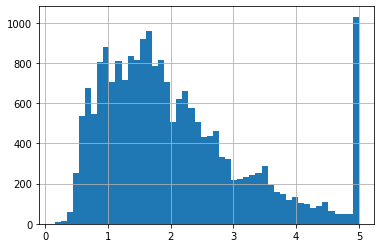

In [16]:
pd.Series(y).hist(bins=50)

In [17]:
bins = np.arange(6)
binned_y = np.digitize(y, bins)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2,stratify=binned_y)

In [18]:
y_binary = np.where(y >= 5, 1,0)

In [19]:
train_shape = X_train.shape[0]
y_train_binned = y_binary[:train_shape]
y_test_binned = y_binary[train_shape:]

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
param_dist = {'max_features' : ['log2',0.5,1.0],
    'max_depth' : [2,3,6],
  'min_samples_leaf' : [1,2,3,10],
  'n_estimators': [100],
  'learning_rate' : [0.1,0.2,0.3,1],
  'loss' : ['deviance']
 }
pre_gs_inst = RandomizedSearchCV(GradientBoostingClassifier(warm_start=True),
                                 param_distributions = param_dist,
                                 cv=3,
                                 n_iter = 10, n_jobs=-1)
pre_gs_inst.fit(X_train, y_train_binned)

RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(warm_start=True),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.2, 0.3, 1],
                                        'loss': ['deviance'],
                                        'max_depth': [2, 3, 6],
                                        'max_features': ['log2', 0.5, 1.0],
                                        'min_samples_leaf': [1, 2, 3, 10],
                                        'n_estimators': [100]})

In [23]:
pre_gs_inst.best_params_

{'n_estimators': 100,
 'min_samples_leaf': 10,
 'max_features': 0.5,
 'max_depth': 2,
 'loss': 'deviance',
 'learning_rate': 0.3}

In [26]:
gbc = GradientBoostingClassifier(**{'learning_rate': 0.3,
             'loss': 'deviance',
             'max_depth': 2,
             'max_features': 0.5,
             'min_samples_leaf': 10,
             'n_estimators': 1000, 'warm_start':True}).fit(X_train, y_train_binned)

In [27]:
y_pred = gbc.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test_binned, y_pred)

0.938468992248062

### Following is for chapter 9-9 Tuning an AdaBoost regressor

In [28]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'loss' : ['linear', 'square', 'exponential']
 }
pre_gs_inst = RandomizedSearchCV(AdaBoostRegressor(),
 param_distributions = param_dist,
 cv=3,
 n_iter = 10,
 n_jobs=-1)
pre_gs_inst.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=AdaBoostRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.3,
                                                          1],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [50, 100]})

In [29]:
pre_gs_inst.best_params_

{'n_estimators': 100, 'loss': 'exponential', 'learning_rate': 0.1}

In [30]:
 param_dist = {
             'n_estimators': [100],
             'learning_rate' : [0.09,0.095,0.1,0.105,0.11],
             'loss' : ['exponential']
             }

In [31]:
import copy
ada_best = copy.deepcopy(pre_gs_inst.best_params_)
ada_best['n_estimators'] = 3000

In [33]:
rs_ada = AdaBoostRegressor(**ada_best)
rs_ada.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.1, loss='exponential', n_estimators=3000)

In [34]:
y_pred = rs_ada.predict(X_test)
from sklearn.metrics import r2_score, mean_absolute_error
print ("R-squared",r2_score(y_test, y_pred))
print ("MAE : ",mean_absolute_error(y_test, y_pred))
print ("MAPE : ",(np.abs(y_test - y_pred)/y_test).mean())

R-squared -0.26216229344417497
MAE :  1.161273566586366
MAPE :  0.9313539579601801
